# A Framawork for Input Reconstruction by Convex Optimization - Notes
M.M., U.H
## Motivation
The input reconstruction problem has previously been solved by filtering methodssuch as [augmented Kalman Fitlers](https://www.sciencedirect.com/science/article/pii/S0888327022001480) and [SISE](https://www.researchgate.net/profile/Bart-De-Moor/publication/222567614_Unbiased_minimum-variance_input_and_state_estimation_for_linear_discrete-time_systems/links/5aa245b4a6fdcc22e2d2e9a2/Unbiased-minimum-variance-input-and-state-estimation-for-linear-discrete-time-systems.pdf) estimators.

Formulating the batch input-reconstruction problem as a convex optimization problem comes at the cost of computational efficiency. Convex optimization has traditionally been considered computationally expensive and has thus had limited use in industry. However, such restrictions are no longer justified ([Boyd, 2010](https://web.stanford.edu/~boyd/papers/pdf/rt_cvx_sig_proc.pdf)). Computational costs for modestly sized convex optimization problems is not a relevant issue as the computational power has increased, industrial PC are replacing/complementing PLC controllers in plants, and optimization software are improving. In our opinion, the added benefits of posing the problem as a convex optimization problem outweigh the downsides.

Some added benefits of posingn the problem as a convex program are:
- Input models and restrictions can easily be included in the optimization problem
- Non-uniform sampling intervals can easily be handled
- More intuitive interpolation scemes possible (?). ZOH used in filtering not always realistic...
- Constraints ensuring that result are phycally justified can easily be included (e.g. satisfies mass&energy balances, non-negative signals etc.)

Some chalenges posing the input reconstruction problem as a convex program:
- Real-time implementations are stil challenging for high sampling rates

## System model
Consider the discrete-time state-space represetnation of a system
$$
x(k+1) = Ax(k) + Bu(k), \\
y(k) = Cx(k) + v(k),
$$
where $x(k)\in\mathbb{R}^n$ are the system states, $u(k)\in\mathbb{R}^m$ are (unknown) input signals, $y(k)\in\mathbb{R}^l$ measurements, and $v(k)\in\mathbb{R}^l$ measurement noise. Repeated substitution of the state equation into the measurement equation gives
$$y = \mathcal{O}x(0) + \Gamma u + v, $$
where
$$
y = \begin{bmatrix}
y(0)\\ \vdots \\ y(N-1)
\end{bmatrix},
~u = \begin{bmatrix}
u(0)\\ \vdots \\ u(N-1)
\end{bmatrix},
v = \begin{bmatrix}
v(0)\\ \vdots \\ v(N-1)
\end{bmatrix},
$$
and
$$
\Gamma = \begin{bmatrix}
D   &0  &0  &\cdots &0\\
        CB  &D  &0  &\cdots &0\\
        CAB &CB &D  & &0\\
        \vdots  & &\ddots &\ddots &\\
        CA^{N-2} &CA^{N-3} &\cdots &CB &D
\end{bmatrix}
,~\text{and}~
\mathcal{O} = 
\begin{bmatrix}
    C\\CA\\CA^2\\ \vdots \\ CA^{N-1}.
\end{bmatrix}
$$

For simplicity, assume $x(0)=0$. $x(0)$ can be included as an unknown variable if needed. The input reconstruction problem can be formulated as the following least-squares regeression problem

$$
    \begin{align}
    &\underset{u\in\mathbb{R}^{Nm},~v\in\mathbb{R}^{Nl}}{\text{minimize}} \quad L(u) + \sum_{k=0}^{N-1} v(k)^TR^{-1}v(k)\\
    &\text{subject to}\\
    &v = y - \Gamma u
    \end{align}
$$

where $L(u)$ is a regularization term, preferrably design such that $L(u)\in[0,~1]$. Note that without the regularization term $L(u)$ the system might be ill-posed of $m>l$ or $\Gamma$ is rank deficient (not full rank). In the following sections, various ways of regularizing the problem are proposed, all resulting in convex optimization problems.

For known 


# Problem formulations

### Ridge regression
For square-summable signals $u_k$, a natural choise of regularization is the $\ell_2$ norm. Setting $L(u) = \| u \|_2^2$ gives the optimization problem

$$
    \begin{align}
    &\underset{u\in\mathbb{R}^{Nm},~v\in\mathbb{R}^{Nl}}{\text{minimize}} \quad \lambda\|u\|_2^2 + \sum_{k=0}^{N-1} v(k)^TR^{-1}v(k)\\
    &\text{subject to}\\
    &v = y - \Gamma u
    \end{align},
$$

where $\lambda >0$ is a regularization parameter determining the trade-off between regularization and outpur error.

When $u$ is a stochastic signal with known covariance $Q = \mathrm{E}[u(k)^Tu(k)]$, the optimal weightingn is obtained by 

$$
    \begin{align}
    &\underset{u\in\mathbb{R}^{Nm},~v\in\mathbb{R}^{Nl}}{\text{minimize}} \sum_{k=0}^{N-1} u(k)^TQ^{-1}u(k) + \sum_{k=0}^{N-1} v(k)^TR^{-1}v(k)\\
    &\text{subject to}\\
    &v = y - \Gamma u.
    \end{align}
$$


In [ ]:
# Example

### LASSO regression
Same as LASSO but with $L(u) = \| u \|_1$. This might be a useful formulation when $u(k)$ is sparse, e.g., outliers or impulse-like disturbances.

$$
    \begin{align}
    &\underset{u\in\mathbb{R}^{Nm},~v\in\mathbb{R}^{Nl}}{\text{minimize}} \quad \lambda\|u\|_1 + \sum_{k=0}^{N-1} v(k)^TR^{-1}v(k)\\
    &\text{subject to}\\
    &v = y - \Gamma u
    \end{align},
$$



In [ ]:
# Example

### Sparse frequency-domain formulation
Signals often have sparse frequency-domain representations. Expanding the unknown input signal $u$ using the discrete Fourier transform (DFT)

$$
    u(k) = \frac{1}{N}\sum_{n=0}^{N-1} U_n \mathrm{e}^{\mathrm{i}2\pi kn/N},~k=0,1,...,N-1,
$$

where $U_n$ is the $n$th Fourier coefficient providing information on the amplitude and phase of the signal at frequencies $\omega_n = 2\pi n/N$ for $k=0,1,...,N-1$. The DFT representation of $u$ can be written in matrix form

$$
    u = \Phi U
$$

with

$$
    \Phi =
    \frac{1}{N}
    \begin{bmatrix}
    1 &1 &1 &\cdots &1\\
          1 &\mathrm{e}^{\mathrm{i}2\pi/N} &\mathrm{e}^{\mathrm{i}4\pi/N} &\cdots &\mathrm{e}^{\mathrm{i}2(N-1)\pi/N}\\
          1 &\mathrm{e}^{\mathrm{i}4\pi/N} &\mathrm{e}^{\mathrm{i}8\pi/N} &\cdots &\mathrm{e}^{\mathrm{i}4(N-1)\pi/N}\\
          \\
          1 &\mathrm{e}^{\mathrm{i}2(N-1)\pi/N} &\mathrm{e}^{\mathrm{i}4(N-1)\pi/N} &\cdots &\mathrm{e}^{\mathrm{i}2(N-1)^2\pi/N}
    \end{bmatrix}
$$

For real signals $u$, the Fourier coefficient appear in complex conjugated pairs such that $U_k = U^\ast_{N-k}$, $k=1,2,...,N-1$, and $U(0)\in\mathbb{R}$. 

This gives the convex optimization problem

$$
\begin{aligned}
    \underset{U\in\mathbb{C}^{Nm},v\in\mathbb{R}^{Nl}}{\text{minimize}} \quad& \lambda\| U \|_1 + \sum_{k=0}^{N-1} v(k)^\top R^{-1} v(k) \\
    \text{subject to} \quad& v = y - \Gamma\Phi U\\
    \quad& U_k = U^\ast_{N-k},~k=1,2,...,N-1.
\end{aligned}
$$

The input estimate is $u = \Phi U$. It is well-known that the $\ell_1$ norm induces sparsity.

In [ ]:
# Example

### Trend filtering formulation
Hodrick-Prescott (H-P) trend filtering and $\ell_1$ trend filtering can be applied to induce smooth estimnates or piecewise estimates respectively. The H-P trend-filtering method uses

$$
    L_{\mathrm{H-P}}(u) = \sum_{k=1}^{N-2} ( u(k-1) - 2u(k) + u(k+1)  )^2 = \| \Delta_2 u\|_2^2,
$$

and the $\ell_1$ trend fitlering

$$
    L_{\ell_1}(u) = \sum_{k=1}^{N-2}  |u(k-1) - 2u(k) + u(k+1)  | = \| \Delta_2 u\|_1,
$$

In [ ]:
# Example

### Input reconstruction using splines
Cubic splines function defined by piecewise polynoimals used for smoothing. The cubic spline is a piecewise interpolation model fits a cubic polynomial to each pais or data ([Cubic Spline Intro](https://towardsdatascience.com/cubic-splines-the-ultimate-regression-model-bd51a9cf396d)). To ensure that the interpolation is smooth, teh 1st and 2nd derivatives are set to be equal at every point where two polynomials meet.

#### Mathematics of a cubic spline
##### Single knot
Consider a set of $N$ datapoints $y(t_0), y(t_1),...,y(t_{N-1})$ on the interval $t_k \in [a, b]$. Partitioning the interval $[a,~b]$ into two parts with a so called knot point $c \in (a,~b)$, a cubic spline consisting of two piecewise cubic polynomials 

$$
\begin{align}
  p_1(t)&=a_{11}t^3 + a_{12}t^2 + a_{13}t + a_{14},    & a \leq t < c,\\
  p_2(t)&=a_{21}t^3 + a_{22}t^2 + a_{23}t + a_{24},    & c \leq t \leq b.
\end{align}
$$

that interpolates the data as
$$
y(t) =
\begin{cases}
p_1(t), &a \leq t < c,\\
p_2(t), &c \leq t < b.\\
\end{cases}
$$

The regression problem consists of determining the parameters $a_{ij}$ such that the least-squares cost is minimized between knots and ensuring that the transition between knots is smooth. Smoothness can be enforces by the following conditions
* Start and end conditions: $p_1(a) = y_\mathrm{start}$, $p_2(b) = y_\mathrm{end}$
* Continuity as knot point: $p_1(c) = f_2(c)$,
* Differentiability as knot point: $\frac{\mathrm{d}}{\mathrm{d}t}p_1(c) = \frac{\mathrm{d}}{\mathrm{d}t}p_2(c)$,
* Smoothness as knot point: $\frac{\mathrm{d^2}}{\mathrm{d}t^2}p_1(c) = \frac{\mathrm{d}^2}{\mathrm{d}t^2}p_2(c)$.

Note that $p_2^{(n)}(c) = p_2^{(n)}(c)$ is automatically satisfied for higher-order derivatives $n>2$ since $p_i^{(n)}(c) = 0$ for cubic splines. Evaluating the first and second derivatives at point $c$ gives the conditions
$$
\begin{align}
    &3c^2a_{11} + 2ca_{12} + a_{13} = 3c^2a_{21} + 2ca_{22} + a_{23} \\
    &6ca_{11} + 2a_{12} = 6ca_{21} + 2a_{22}.
\end{align}
$$

##### Multiple knots
In general, one might want to divide the domain into $K \leq N-1$ knot points such that the knots $t_{c_i}$ are placed at datapoints: $y_{c_i} = t_k$ for some $k\in[0,~N-1]$. In total, $K+1$ cubic polynomials $p_i(t)$ gets fitted to the data. Given samples $(t_0,u_0),(t_1,u_1),...,(t_{N-1},u_{N-1})$,


defining

$$
\varphi(t)^T =
\begin{bmatrix}
1 &t &t^2 &t^3
\end{bmatrix}
~\text{and}~
a_i^T =
\begin{bmatrix}
a_{1,i} &a_{2,i} &a_{3,i} &a_{4,i},
\end{bmatrix}
$$

the estimated signal between knots $c_i$ and $c_{i+1}$ is given by the polynomials

$$
\begin{align}
    p_0(t) &= \varphi^T(t) a_0, \quad t\in[0,~t_{c_{i}}]\\
    p_i(t) &= \varphi^T(t) a_i, \quad t\in[t_{c_i},~t_{c_{i+1}}],~i=1,...,K-1\\
    p_K(t) &= \varphi^T(t) a_K, \quad t\in[t_{c_{K-1}},~t_{N-1}]
\end{align}
$$

obtained by minimize the least-squares cost function

$$
J(a_i) = \sum_{i=0}^{K-1} \left(\sum_{k=c_i}^{c_{i+1}} \left( u(t_k) - \varphi(t_k)^Ta_i \right)^2\right)
$$

subject to constraints:

**Continuity:**
$$p_i(t_{c_{i+1}}) = p_{i+1}(t_{c_{i+1}}), \quad i=0,...,K-1$$

**Differentiability:**
$$
\begin{align}
    \begin{bmatrix}
        0 &1 &2t_{c_i} &3t_{c_i}^2
    \end{bmatrix} a_i  &=
    \begin{bmatrix}
        0 &1 &2t_{c_i} &3t_{c_i}^2
    \end{bmatrix}a_{i+1} \quad &i=0,...,K-2 \\
    \begin{bmatrix}
        0 &0 &2 &6t_{c_i}
    \end{bmatrix} a_i  &= 
    \begin{bmatrix}
        0 &0 &2 &6t_{c_i}
    \end{bmatrix}a_{i+1} \quad &i=0,...,K-2
\end{align}
$$

**Start and end conditions:**
There are many ways to enforce start and end conditions.
1. The most common one is to enforce that the second derivative at start and end points are zero.
$$
\begin{align}
    \begin{bmatrix}
        0 &0 &2 &6t_{0}
    \end{bmatrix} a_0  &= 0\\
    \begin{bmatrix}
        0 &0 &2 &6t_{N-1}
    \end{bmatrix} a_{K-1}  &= 0\\
\end{align}
$$
A spline satisfying this is called a *natural spline*.

2. Known start and end values
$$p_0(t_0) = \alpha_0,~p_{K}(t_{N-1}) = \alpha_2, \quad \alpha_1, \alpha_2 \in \mathbb{R}$$


**Remark:** Note that we have in total $4K$ unknowns and $4K$ constraints. Thus, there exists a unique spline that interpolates the knot points. However, in this setup, we are not interested in finding splines that exactly interpolates the knots, but approximates the data inbetween knots. Thus, we solve a constrained least-squares problem. The resulting spline is $C^2$ differentiable everywhere (verify this).

*What is the connection to B-splines? Can this procedure be simplified using B-spline basis functions?*

#### Example problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Example from CVX Boyd
# http://web.cvxr.com/cvx/examples/cvxbook/Ch06_approx_fitting/html/fig6_20.html

# ------ GENERATE DATA --------
#number of data points
N = 60
K = 2
#time samples
t = np.linspace(-1,1,num=N)
#noise
v = 0.01*np.random.randn(N)
#generate signal
u0 = np.divide(1,5+40*np.power(t,2)) + 0.1*np.power(t,3); 
u = np.array(u0 + v)

#### Define some useful functions
1. **segment_data** segnemts the $(t,u)$ data given knot points $c$.
1. **phi_mat** creates the matrix $\Phi$ such that $\hat{u} = \Phi a$ for the whole dataset.
1. **phi_vec** creates the matrix $\Phi_k$ such that $\hat{u} = \Phi_k a_k$ in segment $k$.
1. **get_cvx_spline_vars** creates cvxpy variables of $a, \hat{u}$ for the cubic spline fitting problem.
1. **get_cvx_spline_obj** creates the cvxpy objective function for the cubic spline fitting problem.
1. **get_cvx_output_constraints** creates additional cvxpy constraints for including $\hat{u}$ as additionalö variables.
1. **get_cvx_smoothness_constraints** creates cvxpy constraints to ensure that the resulting spline is $C^2$ differentiable everywhere.

In [14]:
# ------ DEFINE FUNCTIONS --------
def segment_data(t,u,t_c):
    '''Segments a dataset t into segments separeted by knot points.'''
    K = len(t_c) #number of 
    N = len(t)   #number of data points
    inds = []    #indices in segment
    t_i = []     #t in segment
    u_i = []     #u in segment
    N_i = []     #number of points in segment
    #assign points to intervals
    inds.append([ k for k in range(N) if -1.0  <= t[k] < t_c[0] ])
    t_i.append(t[inds[0]])
    u_i.append(u[inds[0]])
    N_i.append(len(inds[0]))
    for i in range(K-1): 
        if i > 0:
            inds.append([ k for k in range(N) if t_c[i-1]  <= t[k] < t_c[i] ])
            t_i.append(t[inds[i]])
            u_i.append(u[inds[i]])
            N_i.append(len(inds[i]))
    inds.append([ k for k in range(N) if t[k] > t_c[-1] ])
    t_i.append(t[inds[-1]])
    u_i.append(u[inds[-1]])
    N_i.append(len(inds[-1]))
    return inds, t_i, u_i, N_i

def phi_mat(t):
    '''Computes the matrix Phi: u = Phi'*a'''
    #creates the matrix Phi = [1 t t^2 t^3;...]
    Phi = np.fliplr(np.vander(t)[:,-4:])
    return Phi

def phi_vec(segment_time):
    '''Computes the vector'''
    K = len(segment_time)
    Phi_k = []
    for k in range(K):
        Phi_k.append( phi_mat(segment_time[k]) )
    return Phi_k

def get_cvx_spline_vars(K,N):
    '''Generate variables for cvx cubic spline fitting'''
    a = cp.Variable(4*(K+1))
    uhat = cp.Variable(N)
    print('cvxpy variables was created')
    return a, uhat

def get_cvx_spline_obj(segment_u, Phi_k):
    '''generate objective function for cubic spline fitting'''
    K = len(segment_u)-1
    cost = 0
    n = 0
    for k in range(K+1):
        cost += cp.sum_squares(segment_u[k] - Phi_k[k]@a[n:n+4])
        n += 4
    objfun = cp.Minimize(cost)
    print('cvxpy objective function was created')
    return objfun

def get_cvx_output_constraints(a, uhat, Phi_k):
    K = len(Phi_k)-1
    n=0
    N=0
    constraints = []
    for k,phi in enumerate(Phi_k):
        constraints += [uhat[N:N+len(phi)] == phi@a[n:n+4]]
        n += 4
        N += len(phi)
    print('cvxpy output constraints was created')
    return constraints

def get_cvx_smoothness_constraints(knots_time):
    '''generate smoothnes constraints for cubic spline fitting'''
    constraints = []
    n = 0
    for k in range(K):
        a_1 = a[n:n+4]
        a_2 = a[n+4:n+8]
        #continuity
        C_cont = np.array([1, knots_time[k], np.power(knots_time[k],2), np.power(knots_time[k],3)])
        #first derivative defined everywhere
        C_dt = np.array([0, 1, 2*knots_time[k], 3*np.power(knots_time[k],2)])
        #second derivative defined everywhere
        C_ddt = np.array([0, 0, 2, 6*knots_time[k]])
        constraints += [
            C_cont@a_1 == C_cont@a_2,
            C_dt@a_1 == C_dt@a_2,
            C_ddt@a_1 == C_ddt@a_2
                       ]
        n += 4
    print('cvxpy C2 differentiability constraints was created')
    return constraints

cvxpy variables was created
cvxpy objective function was created
cvxpy C2 differentiability constraints was created
cvxpy output constraints was created


Text(0, 0.5, 'Signal $u$')

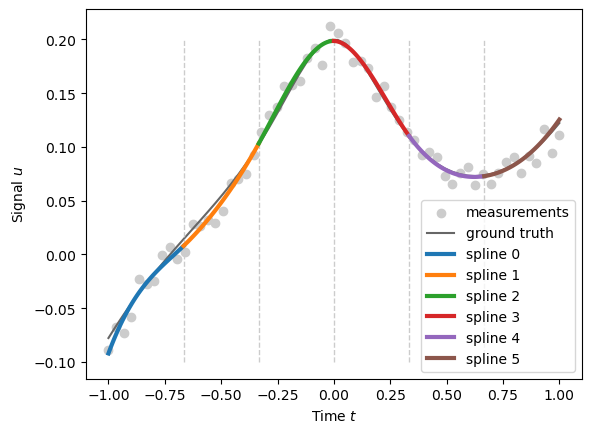

In [15]:
# #### CREATE PARAMETERS ####
'''NOTE: each segment needs to contain a data point!'''
K = len(t_c) #number of knots
N = len(t) # number of data points
t_start = t[0]
t_end = t[-1]

# define knot points
knots = np.array([-2/3, -1/3, 0, 1/3, 2/3])
# segment data
inds_i, t_i, u_i, N_i = segment_data(t,u,knots)
# create Phi matrices: uhat = Phi*a within segment
Phi_i = phi_vec(t_i)

# #### CVX PROBLEM ####
#----  get optimization variables ----
a, uhat = get_cvx_spline_vars(K,N)
#---- get objective function ----
objfun = get_cvx_spline_obj(u_i, Phi_i)
#---- get constraints ----
constraints = get_cvx_smoothness_constraints(knots)
# add outputs as variables (optional)
constraints += get_cvx_output_constraints(a, uhat, Phi_i)
# add start constraints (optional)
#constraints += [u[0] == uhat[0]]
# add end constraints (optional)
#constraints += [u[-1] == uhat[-1]]
# add additional constraints if needed...

#---- create cvxpy problem ----
prob = cp.Problem(objfun,constraints)
prob.solve(verbose = False)

# #### SUMMARIZE RESULTS ####
n  = 0
ahat=[]
for k in range(K+1):
    ahat.append(a[n:n+4])
    n += 4
    
# #### PLOT RESULTS ####
plt.scatter(t, u, color=[0.8, 0.8, 0.8], label='measurements')
plt.plot(t,u0,color=[0.4, 0.4, 0.4],label='ground truth')
for knot in knots:
    plt.plot([knot, knot],[-0.1, 0.2],color=[0.8, 0.8, 0.8],linestyle='dashed',linewidth=1)

for k, a_i, in enumerate(ahat):
    if k==0: #first segment
        ti = np.linspace(t_start,knots[0],100)
    elif k==len(ahat)-1: #last segment
        ti = np.linspace(knots[k-1],t_end,100)
    else:
        ti = np.linspace(knots[k-1],knots[k],100)
    #interpolated input
    ui = phi_mat(ti)@a_i.value
    plt.plot(ti,ui,label='spline '+str(k),linewidth=3)
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Signal $u$')

### Input reconsntruction using cubic splines
consider the continuous-time system

$$
\begin{align}
    \dot{x}(t) &= Ax(t) + Bu(t)
\end{align}
$$

where noise measurements are obtained at dicrete time instances 

$$
y(t_k) = Cx(t_k) + v(t_k), \quad k=0, 1, ..., N-1.
$$

As before, denote the noise covariance $\mathrm{E}[v(k)^Tv(k)] = R$. The output of the system from $t_{0}$ to $t$ is, cf. ([MIT, Contineous-time state-space model](https://ocw.mit.edu/courses/6-241j-dynamic-systems-and-control-spring-2011/79f1a26e91a057181d225d2e1ffa0b57_MIT6_241JS11_chap11.pdf)),
$$
\begin{align}
    x(t) = \mathrm{e}^{(t-t_0)A}x(t_0) + \int_{t_0}^{t} \mathrm{e}^{A(t-\tau)}Bu(\tau) \mathrm{d}\tau
\end{align}
$$

Let's represent the input signal by a spline function between time instances $t_k$ and $t_{k+1}$

$$
\begin{equation}
u(t_k) = \varphi^T(t_k)a = a_0 + t_k a_1 + t_k^2 a_2 + t_k^3 a_3,
\end{equation}
$$

Denote the Laplace transform of the system

$$
G(s) = (sI - A)^{-1}x(0) + C(sI - A)^{-1}B.
$$ 

The Laplace transform of $u(t)$ is (cf. [Laplace transform table](https://i.stack.imgur.com/Emjqz.png))

$$
U(s) = \frac{1}{s}a_0 + \frac{1}{s^2}a_1 + \frac{2}{s^3}a_2 + \frac{6}{s^3}a_3
$$

and the Laplace-domain input-output relation

$$
\begin{align}
 Y(s) &= (sI - A)^{-1}x(0) + G(s)U(s)\\ 
 &= (sI - A)^{-1}x(0) + \left( \frac{G(s)}{s} \right)a_0 + \left( \frac{G(s)}{s^2} \right)a_1 + 2\left( \frac{G(s)}{s^3} \right)a_2 + 6\left( \frac{G(s)}{s^4} \right)a_3.
\end{align}
$$

Although analytical expressions seems to be somewhat tedious to obtain through inverse transformation, the important takeaway is that the system response depends linearily on $a$. Thus, by the additivity of tha Laplace transform, the response is
$$
 x(t) = \mathrm{e}^{At}x(0) + \mathcal{L}^{-1} \left\{ \frac{G(s)}{s} \right\}a_0 + \mathcal{L}^{-1}\left\{ \frac{G(s)}{s^2} \right\}a_1 + \mathcal{L}^{-1}\left\{ \frac{2G(s)}{s^3} \right\}a_2 + \mathcal{L}^{-1} \left\{ \frac{6G(s)}{s^4} \right\}a_3 .
$$

In practice, the reponse of all terms $\frac{G(s)}{s}, \frac{G(s)}{s^2}, ... $, can becomputed nummerically.

## Support-vector formulation
### Least-square support-vector regression
### The $\varepsilon$-insensitivity loss function

# Real-time convex optimization

## Filtering implementation (WIP)
Note that the SISE problem can (supposedly) besolved on a sample-by-sample basis by posing it as a convex optimization problem, cf. the state-estimation problem ([Boyd, 2010](https://web.stanford.edu/~boyd/papers/pdf/rt_cvx_sig_proc.pdf)). 

Consider the system model with known measurement noise covariance $R$. The CVX input-and-state-estimation problem would be done in the folliwing steps

0. Initialization: $\hat{x}_{0,-1}$, $R, P = (I-KC)( APA^T + Q ), K = PC^T(CPC^T + v)^{-1}$
1. Optimization:
$$
    \begin{align}
    &\underset{x_k,u_{k|k-1},v_k}{\text{minimize}} \quad L(u_k) + v_k^T R^{-1} v_k + ( x_k - \hat{x}_{k|k-1} )^TP^{-1}( x_k - \hat{x}_{k|k-1} )\\
    &\text{subject to}\\
    &\hat{x}_{k|k-1} = A\hat{x}_{k-1|k-1} + Bu_{k|k-1}\\
    &y_k = Cx_k + v_k
    \end{align}
$$
2. Prediction: $\hat{x}_{k|k} = \hat{x}_{k|k-1} + K(y - C\hat{x}_{k|k-1})$

For known inputs $u_k$ this formulation implements a **filtering Kalman filter**. Note that there are several reasons to believe that this method is flawed.
* The state error covariance $P$ in (0.) is (?) dependent on input estimates $u_k$.
* In (1.) the outputs $y_k$ are leanearily dependent on both $x_k, u_k$ and $v_k$. Thus, without additional contraints on $u_k$ the output error $v_k$ can either be attributed to $x_k$, $u_k$, or $v_k$. Hence, the term $L(u)$ was included. Determining $L(u)$ for completely unknown signals might be tricky! 
* The input update is missing from (2.), i.e., measurements are not used to update $u$ ?

These flaws illustrates the main challenges with SISE estimation. Ideas from [(Gillijns, 2007)](https://www.researchgate.net/profile/Bart-De-Moor/publication/222567614_Unbiased_minimum-variance_input_and_state_estimation_for_linear_discrete-time_systems/links/5aa245b4a6fdcc22e2d2e9a2/Unbiased-minimum-variance-input-and-state-estimation-for-linear-discrete-time-systems.pdf) could be incorporated here.

## Recursive least squares
The input reconstructoin problem can be implemented as a [recursive least-squares](https://en.wikipedia.org/wiki/Recursive_least_squares_filter) problem with exponential forgetting.

## Moving-horizon estimation
A moving-horizon implementation of the input reconstruction problem would be a nice contribution to control & estimation theory. 

## Real-time CVX optimization
For example, Boyd has presented real-time CVX frameworks on seminars. We should follow this progress.


# Publication plan
1. IFAC CAMS 2024 Conference Paper: Reconstruction of smooth unknown input signals
    - Trend filtering
    - $\ell_2$ regularization
2. Cubic splines
2. Conference Paper TBD: Input reconstruction by sparse optimization
    - Sparse DFT representation
    - Support-vector formaulation
3. Journal paper TBD: A convex-optimization framework for input and state estimation (CVX-SISE)
    - Framework + source code
    - Application
4. Journal paper TBD: Real-time implementation of CVX input reconstruction

# Old text
### Splines
Defining matrices
$$
\begin{align}
    A &=
    \begin{bmatrix}
    a_1 &a_2 &\cdots &a_K
    \end{bmatrix}
    =
    \begin{bmatrix}
    a_{11} &a_{21} &\cdots &a_{K+1,1}\\
    a_{12} &a_{22} &\cdots &a_{K+1,2}\\
    a_{13} &a_{23} &\cdots &a_{K+1,3}\\
    a_{14} &a_{24} &\cdots &a_{K+1,4}
    \end{bmatrix},\\
    %
    \Phi &=
    \begin{bmatrix}
    \varphi(0)^T\\
    \varphi(1)^T\\
    \vdots\\
    \varphi(N-1)^T
    \end{bmatrix}
    =
    \begin{bmatrix}
    t_0^3 &t_0^2 &t_0 &1\\
    t_1^3 &t_1^2 &t_1 &1\\
    \vdots &\vdots &\vdots &\vdots\\
    t_{N-1}^3 &t_{N-1}^2 &t_{N-1} &1\\
    \end{bmatrix},\\
    %
    F &= 
    \begin{bmatrix}
    f_1 &f_2 &\cdots &f_{K+1}
    \end{bmatrix}
    =
    \begin{bmatrix}
    f_1(t_0) &f_2(t_0) &\cdots &f_{K+1}(t_0)\\
    f_1(t_1) &f_2(t_1) &\cdots &f_{K+1}(t_1)\\
    \vdots &\vdots &       &\vdots\\
    f_1(t_{N-1}) &f_2(t_{N-1}) &\cdots &f_{K+1}(t_{N-1})
    \end{bmatrix}
\end{align}
$$

we have that
$$
F = \Phi A,~\text{and}
$$

and

$$
f_i(t_k) = \varphi(t_k)^Ta_i, \quad i=1,...,K, k=0,1...,N-1.
$$

The interpolation scheme is
$$
\hat{y}(k) = 
\begin{cases}
f_1(t_k), & k < c_1,\\
f_2(t_k), &c_1 \leq k < c_2.\\
\vdots &\vdots\\
f_{K}(t_k), &c_{K-1} \leq k < c_{K}\\
f_{K+1}(t_k), &c_{K} \leq k.
\end{cases}
$$

Resulting in the optimization problem
$$
    \begin{align}
    &\underset{\hat{y},~a_i}{\text{minimize}} \quad \|  y - \hat{y} \|_2^2\\
    &\text{subject to}\\
    \text{ Piece-wise regression}
    &\begin{cases}
        f_i(t_k) = \varphi(t_k)^Ta_i, &i=1,...,K,~k=0,1...,N-1 \\
    \end{cases}\\
    %
    \text{Interpolation }
    &\begin{cases}
        \hat{y}(t_k) = f_1(t_k), &0 < k <c_1\\
        \hat{y}(t_k) = f_i(t_k), &c_{i-1} \leq k < c_{i},~i=2,...,K\\
        \hat{y}(t_k) = f_{K+1}(t_k), &c_K \leq k < N-1.\\
    \end{cases}\\
    %
    \text{Knot-point conditions }
    &\begin{cases}
        0 = 3(a_{i1} - a_{i+1,1})c_i^2 + 2(a_{i2}-a_{i+1,2})c_i + (a_{i3} - a_{23}), &i=1,..,K+1, \\
        0 = 6(a_{i1} - a_{i+1,1})c_i + 2(a_{i2} - a_{i+1,2}), &i=1,..,K+1,
    \end{cases}\\
    %
    \text{Start and end conditions }
    &\begin{cases}
        f_1(t_0) = y_{\mathrm{start}},\\
        f_{K+1}(t_{N-1}) = y_{\mathrm{end}}.
    \end{cases}
    \end{align},
$$

Note that although this might look complicated, it can be rewritten as a standard convex optimization problem (not same $A,f,b$ as before)
$$
    \begin{align}
    &\underset{x}{\text{minimize}} \quad f(x)\\
    &\text{subject to}\\
    &Ax - b = 0.
    \end{align}
$$

<font color="red">Verify this! Might have some even simpler solution since only equality constraint and quadratic objective. Solvable using Lagrange multipliers (KKT)?</font>

In [ ]:
# Example from CVX Boyd inplemented in python
# http://web.cvxr.com/cvx/examples/cvxbook/Ch06_approx_fitting/html/fig6_20.html

# ------ GENERATE DATA --------
#number of data points
N = 40
K = 2
#time samples
t = np.linspace(-1,1,num=N)
#noise
v = 0.01*np.random.randn(N)
#generate signal
u0 = np.divide(1,5+40*np.power(t,2)) + 0.1*np.power(t,3); 
u = np.array(u0 + v)

# ------ CREATE PARAMETERS --------
#Knot points
t_knots = np.array([-1/3, 1/3])
#assign points to intervals
ind_1 = np.where((t<t_knots[0]))
t_1 = t[ind_1]
u_1 = u[ind_1]
N_1 = len(t_1)

ind_2 = np.where((t>=t_knots[0]) & (t<=t_knots[1]))
t_2 = t[ind_2]
u_2 = u[ind_2]
N_2 = len(t_2)

ind_3 = np.where((t>t_knots[1]))
t_3 = t[ind_3]
u_3 = u[ind_3]
N_3 = len(t_3)


# create Phi matrices
def phi_mat(t):
    #creates the matrix Phi = [1 t t^2 t^3;...]
    Phi = np.fliplr(np.vander(t)[:,-4:])
    return Phi


Phi_1 = phi_mat(t_1)
Phi_2 = phi_mat(t_2)
Phi_3 = phi_mat(t_3)

Phi = np.vstack((Phi_1,Phi_2,Phi_3))


# ------ CVX PROBLEM --------
a_1 = cp.Variable(4)
a_2 = cp.Variable(4)
a_3 = cp.Variable(4)
uhat_1 = cp.Variable(N_1)
uhat_2 = cp.Variable(N_2)
uhat_3 = cp.Variable(N_3)

#continuity constraints at knots
C_cont1 = np.array([1, t_knots[0], np.power(t_knots[0],2), np.power(t_knots[0],3)])
C_cont2 = np.array([1, t_knots[1], np.power(t_knots[1],2), np.power(t_knots[1],3)])
#differentiability at knots
C_dt1 = np.array([0, 1, 2*t_knots[0], 3*np.power(t_knots[0],2)])
C_dt2 = np.array([0, 1, 2*t_knots[1], 3*np.power(t_knots[1],2)])
#smooth at knot
C_ddt1 = np.array([0, 0, 2, 6*t_knots[0]])
C_ddt2 = np.array([0, 0, 2, 6*t_knots[1]])
#start and end conditions
C_start = np.array([0, 0, 2, 6*t_1[0]])
C_end = np.array([0, 0, 2, 6*t_3[-1]])
#objective funtion
objfun = cp.Minimize( cp.sum_squares(u_1 - uhat_1) + cp.sum_squares(u_2 - uhat_2) + cp.sum_squares(u_3 - uhat_3) )
# constraints
constraints = [#estimates
        uhat_1 == Phi_1@a_1,
        uhat_2 == Phi_2@a_2,
        uhat_3 == Phi_3@a_3,
        #start end conditions
        #C_start@a_1 == 0,
        #C_end@a_3 == 0,
        uhat_1[0] == u[0],
        uhat_3[-1] == u[-1],
        #continuity at knots
        C_cont1@a_1 == C_cont1@a_2,
        C_cont2@a_2 == C_cont2@a_3, 
        #differentability at knots 
        C_dt1@a_1 == C_dt1@a_2,
        C_dt2@a_2 == C_dt2@a_3,
        #smoothness at knots
        C_ddt1@a_1 == C_ddt1@a_2,
        C_ddt2@a_2 == C_ddt2@a_3
     ]
#optimization problem
prob = cp.Problem(objfun,constraints)
prob.solve(verbose = False)

# ------ PLOT RESULTS --------
t_1 = np.linspace(-1,t_knots[0],100)
uhat_1 = phi_mat(t_1)@a_1.value
t_2 = np.linspace(t_knots[0],t_knots[1],100)
uhat_2 = phi_mat(t_2)@a_2.value
t_3 = np.linspace(t_knots[1],1,100)
uhat_3 = phi_mat(t_3)@a_3.value

for knot in t_knots:
    plt.plot([knot, knot],[-0.1, 0.2],color='black',linestyle='dashed')
#plt.plot(t, u0, color='black')
plt.scatter(t, u, color='green')
plt.plot(t_1,uhat_1,color='red')
plt.plot(t_2,uhat_2,color='blue')
plt.plot(t_3,uhat_3,color='magenta')